In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url = 'https://raw.githubusercontent.com/tanishq21/Mall-Customers/main/Mall_Customers.csv'
df = pd.read_csv(url)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant columns for clustering
columns_to_use = [col for col in df.columns if col in ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = df[columns_to_use]

# Normalize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
pd.DataFrame(X_scaled, columns=columns_to_use).head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [4]:
# Apply K-Means clustering
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print("Dataset with Cluster Labels:")
print(df.head())

Dataset with Cluster Labels:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


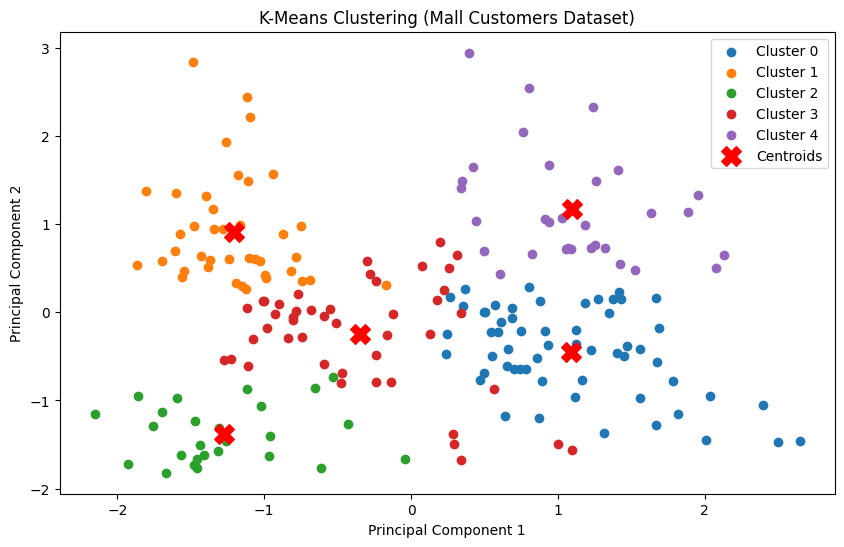

In [5]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == cluster, 0],
                X_pca[cluster_labels == cluster, 1],
                label=f"Cluster {cluster}")

# Mark centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering (Mall Customers Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()